In [44]:
# Tasks:

# On the Online Retail dataset, perform the following task.
# 1 Data Loading
# 2 Data Visualization
# 3 Data Preprocessing
# 4 Freuqent Patterns Generation using both Apriori and FP-Growth
# 5 Strong Association Rules Generation

In [45]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules

#data loading
df = pd.read_excel('Online_Retail.xlsx')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


C:\Users\Acer\AppData\Local\Temp\ipykernel_15128\1290957162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_counts.index, y=order_counts.values, palette='viridis')


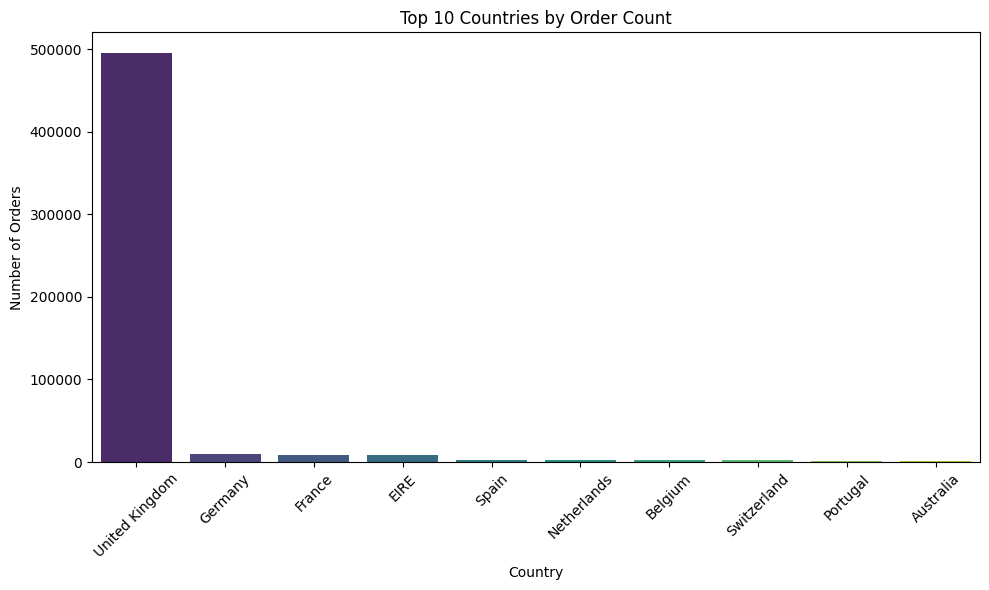

In [46]:
plt.figure(figsize=(10, 6))
order_counts = df['Country'].value_counts().head(10)
sns.barplot(x=order_counts.index, y=order_counts.values, palette='viridis')
plt.title('Top 10 Countries by Order Count')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

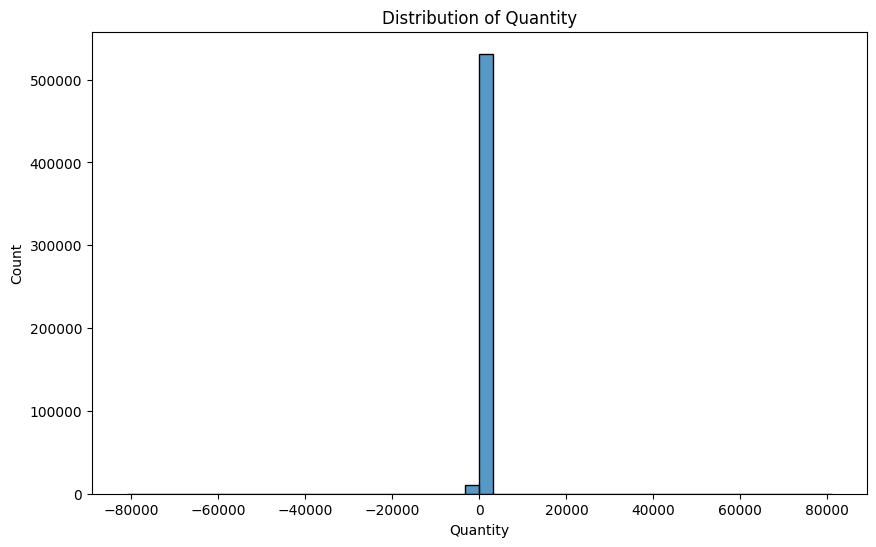

In [47]:
# Histogram of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=50)
plt.title('Distribution of Quantity')
plt.show()



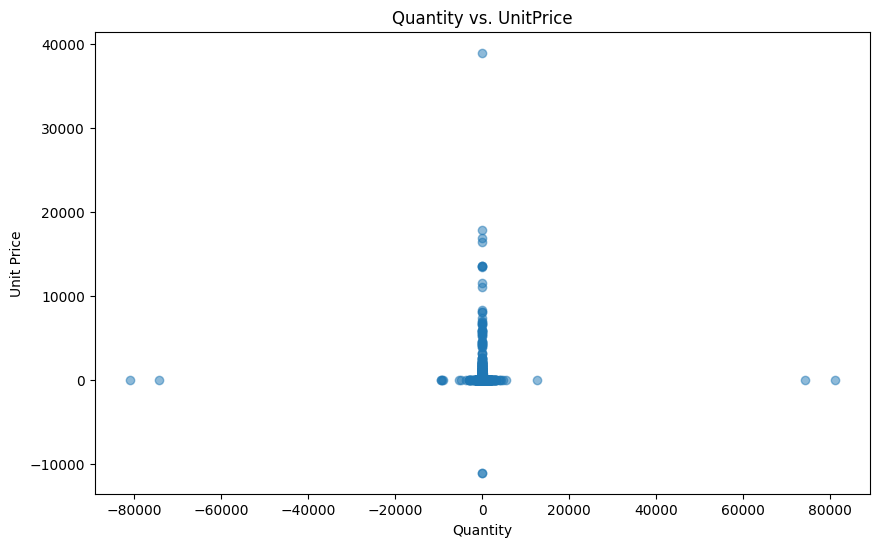

In [48]:

# Scatter plot of Quantity vs. UnitPrice
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['UnitPrice'], alpha=0.5)
plt.title('Quantity vs. UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

In [50]:
#Preprocessing

# Handling missing values
df.dropna(inplace=True)

# Removing duplicates
df.drop_duplicates(inplace=True)

# Converting data types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filtering data
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


In [51]:
# Convert to transaction format (boolean or numeric values)
basket_sets = df.groupby(['InvoiceNo', 'StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

# Convert numeric to boolean format
basket_sets = basket_sets.astype(bool)

# Generating frequent itemsets with Apriori
frequent_itemsets_apriori = apriori(basket_sets, min_support=0.01, use_colnames=True)
print("Apriori:")
print(frequent_itemsets_apriori.head())

# Generating frequent itemsets with FP-Growth
frequent_itemsets_fpgrowth = fpgrowth(basket_sets, min_support=0.01, use_colnames=True)
print("\nFP-Growth:")
print(frequent_itemsets_fpgrowth.head())

Apriori:
    support itemsets
0  0.017483  (15036)
1  0.011116  (17003)
2  0.012033  (20675)
3  0.016080  (20676)
4  0.011871  (20677)

FP-Growth:
    support  itemsets
0  0.106734  (85123A)
1  0.017321  (84029E)
2  0.017213  (84029G)
3  0.016026   (22752)
4  0.013490   (71053)


In [52]:
#strong association rule: 
association_rules_df = association_rules(frequent_itemsets_apriori, metric='confidence', min_threshold=0.04)
print(association_rules_df.head())

  antecedents consequents  antecedent support  consequent support   support  \
0     (20712)     (22386)            0.026549            0.047000  0.010738   
1     (22386)     (20712)            0.047000            0.026549  0.010738   
2     (20712)    (85099B)            0.026549            0.086337  0.014138   
3    (85099B)     (20712)            0.086337            0.026549  0.014138   
4     (20713)    (85099B)            0.022178            0.086337  0.010900   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.404472  8.605817  0.009490    1.600260       0.907903  
1    0.228473  8.605817  0.009490    1.261720       0.927386  
2    0.532520  6.167917  0.011846    1.954444       0.860722  
3    0.163750  6.167917  0.011846    1.164067       0.917046  
4    0.491484  5.692616  0.008985    1.796725       0.843030  
